In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd

# Correct relative path
file_path = "data/redfin_metro_market_tracker.tsv000.gz"

# Load the data
df = pd.read_csv(file_path, sep="\t", compression="gzip")

# Show summary
print(df.shape)
print(df.head())

# Convert date columns
df["PERIOD_BEGIN"] = pd.to_datetime(df["PERIOD_BEGIN"])
df["PERIOD_END"] = pd.to_datetime(df["PERIOD_END"])
df["LAST_UPDATED"] = pd.to_datetime(df["LAST_UPDATED"], errors="coerce")

# Drop useless columns
df = df.drop(columns=["CITY", "STATE"])  # completely empty

# Handle missing values
df = df.dropna(subset=["MEDIAN_SALE_PRICE", "REGION"])  # keep only meaningful rows

# Clean region strings
df["REGION"] = df["REGION"].str.replace(" metro area", "", regex=False).str.strip()

# Optional: filter recent data (e.g., last 3 years)
df_recent = df[df["PERIOD_BEGIN"] >= "2022-01-01"]

# Check summary stats
print(df_recent.describe())
print(df_recent["PROPERTY_TYPE"].value_counts())

(553482, 58)
  PERIOD_BEGIN  PERIOD_END  PERIOD_DURATION REGION_TYPE  REGION_TYPE_ID  \
0   2018-08-01  2018-08-31               30       metro              -2   
1   2020-04-01  2020-04-30               30       metro              -2   
2   2015-03-01  2015-03-31               30       metro              -2   
3   2013-01-01  2013-01-31               30       metro              -2   
4   2018-12-01  2018-12-31               30       metro              -2   

   TABLE_ID  IS_SEASONALLY_ADJUSTED                    REGION  CITY  STATE  \
0     19660                   False    Deltona, FL metro area   NaN    NaN   
1     40820                   False     Ruston, LA metro area   NaN    NaN   
2     33700                   False    Modesto, CA metro area   NaN    NaN   
3     15220                   False  Brownwood, TX metro area   NaN    NaN   
4     32740                   False  Meadville, PA metro area   NaN    NaN   

   ... SOLD_ABOVE_LIST_YOY PRICE_DROPS  PRICE_DROPS_MOM  PRICE_DROP

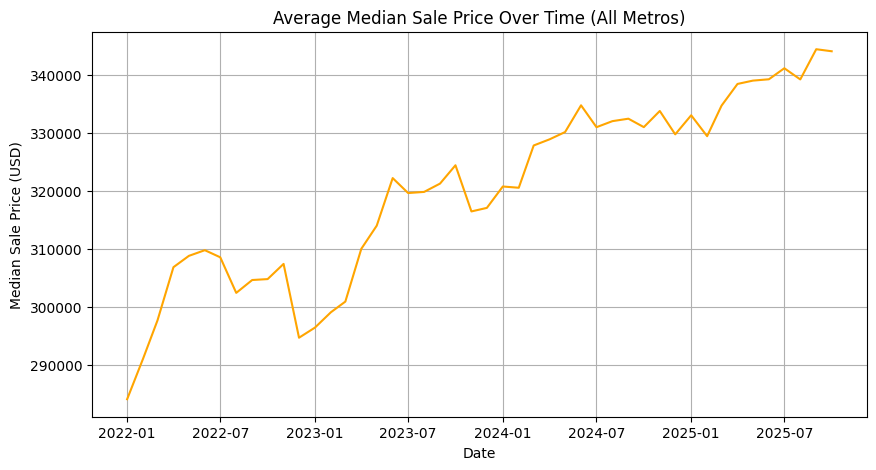

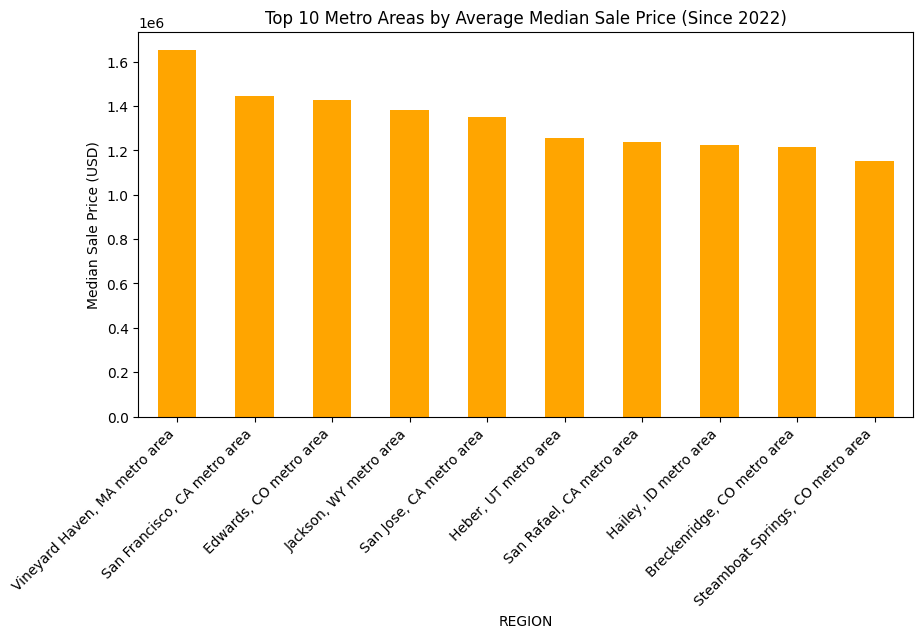

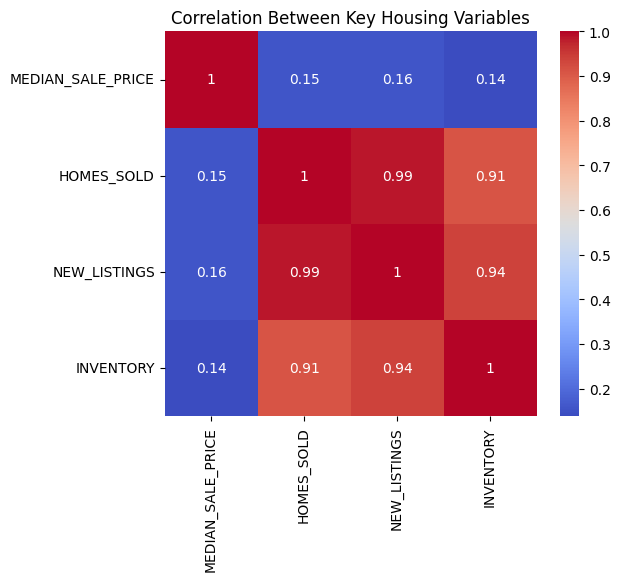

In [4]:
file_path = "data/redfin_metro_market_tracker.tsv000.gz"  # adjust path if needed
data = pd.read_csv(file_path, sep="\t", compression="gzip")

#CLEAN THE DATA
data["PERIOD_BEGIN"] = pd.to_datetime(data["PERIOD_BEGIN"], errors="coerce")

# Remove empty or useless columns
data = data.drop(columns=["CITY", "STATE"], errors="ignore")

# Drop rows missing key values
data = data.dropna(subset=["MEDIAN_SALE_PRICE", "REGION"])

# Keep only data from 2022 and later
data_recent = data[data["PERIOD_BEGIN"] >= "2022-01-01"]

# 1.Price Trend Over Time 
avg_price = data_recent.groupby("PERIOD_BEGIN")["MEDIAN_SALE_PRICE"].mean()

plt.figure(figsize=(10,5))
plt.plot(avg_price.index, avg_price.values, color="orange")
plt.title("Average Median Sale Price Over Time (All Metros)")
plt.xlabel("Date")
plt.ylabel("Median Sale Price (USD)")
plt.grid(True)
plt.show()

# 2.Top 10 Metro Areas by Price
top10 = (data_recent.groupby("REGION")["MEDIAN_SALE_PRICE"]
          .mean()
          .sort_values(ascending=False)
          .head(10))

plt.figure(figsize=(10,5))
top10.plot(kind="bar", color="orange")
plt.title("Top 10 Metro Areas by Average Median Sale Price (Since 2022)")
plt.ylabel("Median Sale Price (USD)")
plt.xticks(rotation=45, ha="right")
plt.show()

# 3. Correlation Heatmap 
cols = ["MEDIAN_SALE_PRICE", "HOMES_SOLD", "NEW_LISTINGS", "INVENTORY"]
corr = data_recent[cols].corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Between Key Housing Variables")
plt.show()